<a href="https://colab.research.google.com/github/oguzhankoc55/Digit-Recognition/blob/main/Rakam_tan%C4%B1maipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits=load_digits() 

In [ ]:
digits.images.shape

(1797, 8, 8)

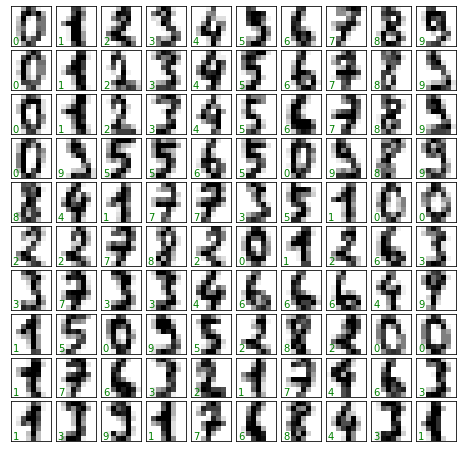

In [ ]:
import matplotlib.pyplot as plt

fig, axes= plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(axes.flat):
  ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
  ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')


In [ ]:
X=digits.data
y=digits.target
print(X.shape)
print(y.shape)


(1797, 64)
(1797,)


In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso=Isomap(n_components=2)

In [ ]:
iso.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap()

In [ ]:
data2=iso.transform(X)
data2.shape

(1797, 2)

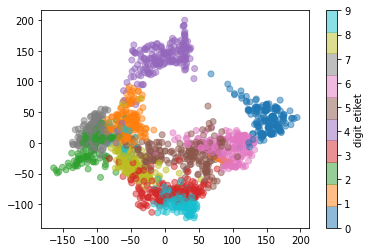

In [ ]:
plt.scatter(data2[:,0],data2[:,1],c=digits.target,alpha=0.5,
            cmap=plt.cm.get_cmap('tab10',10))
plt.colorbar(label='digit etiket',ticks=range(10))


In [ ]:
from sklearn.model_selection import train_test_split
X_egitim,X_test,y_egitim,y_test=train_test_split(X,y,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model=GaussianNB()

In [ ]:
model.fit(X_egitim,y_egitim)

GaussianNB()

In [ ]:
y_model=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.8333333333333334

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_model)

In [ ]:
import seaborn as sns

Text(91.68, 0.5, 'Gerçek Değer')

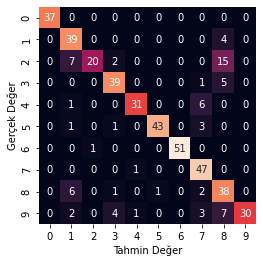

In [ ]:
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('Tahmin Değer')
plt.ylabel('Gerçek Değer')